# Classification d'assertions selons leur valeurs de véracité

In [ ]:
# Importation des différentes librairies utiles pour le notebook

!pip install langdetect
!pip install contractions

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Google Drive

In [ ]:
#Lier notre drive.
from google.colab import drive
drive.mount('/content/gdrive')

my_local_drive = '/content/gdrive/My Drive/Machine Learning/'
sys.path.append(my_local_drive)
%cd $my_local_drive
%ls -l

from MyNLPUtilities import *


df = pd.read_csv('output_400-400-800.csv', sep=',')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Machine Learning
total 9639
-rw------- 1 root root  288490 May 18 15:50 'Copie de Projet_Machine_Learning_hyperparam.ipynb'
-rw------- 1 root root   77412 May 12 09:57 'Copie de Projet_Machine_Learning_test.ipynb'
-rw------- 1 root root  405402 May 20 19:24 'Copie de ProjetMachineLearning_T&FvsM.ipynb'
-rw------- 1 root root    3891 May 11 22:03  MyNLPUtilities.py
-rw------- 1 root root 2133202 May 12 08:33  output_1600-1600.csv
-rw------- 1 root root 3450887 May 11 11:27  output_2600-2600.csv
-rw------- 1 root root 1152416 May 19 13:09  output_400-400-800.csv
-rw------- 1 root root  538621 May 18 12:43  output_400-400.csv
-rw------- 1 root root     143 May 11 22:07  output_400-400.gsheet
-rw------- 1 root root  739465 May 12 09:48  output_400-700.csv
-rw------- 1 root root 1073392 May 11 11:26  output_800-800.csv
drwx------ 2 root 

# Analyse du jeu de données

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

print ("Nombre d'occurrences par classe : \n", df['ratingName'].value_counts())
print ("Shape: " + str(df.shape))


print("\n Apres fusion des classes true et false : \n")
df['ratingName'].replace("TRUE", "TRUEorFALSE", inplace=True) 
df['ratingName'].replace("FALSE", "TRUEorFALSE}", inplace=True) 


print ("Nombre d'occurrences par classe : \n", df['ratingName'].value_counts())
print ("Shape: " + str(df.shape))

Nombre d'occurrences par classe : 
 MIXTURE    800
FALSE      400
TRUE       400
Name: ratingName, dtype: int64
Shape: (1600, 14)

 Apres fusion des classes true et false : 

Nombre d'occurrences par classe : 
 MIXTURE         800
TRUEorFALSE}    400
TRUEorFALSE     400
Name: ratingName, dtype: int64
Shape: (1600, 14)


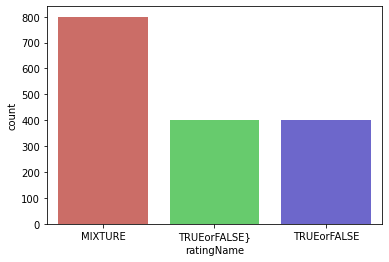

In [ ]:
def create_distribution(dataFile):
    return sb.countplot(x='ratingName', data=dataFile, palette='hls')
create_distribution(df)

In [ ]:
fig=px.scatter(df, x = 'ratingName',  y="date")
fig.show()

fig=px.scatter(df, x = 'ratingName',  y="keywords")
fig.show()


display(df.head())

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/c2...,'And the revenue generated by drilling off Vir...,2012-02-15,2,MIXTURE,Jim Moran,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",politifact,http://www.politifact.com,http://www.politifact.com/virginia/statements/...,English
1,http://data.gesis.org/claimskg/claim_review/1e...,Health insurance companies pay CEOs $24 millio...,2009-09-15,2,MIXTURE,Health Care for America Now,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
2,http://data.gesis.org/claimskg/claim_review/0b...,Ted Cruz said that veterans should start selli...,Unknown,1,TRUEorFALSE},Unknown,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/cruz-cookies/,English
3,http://data.gesis.org/claimskg/claim_review/a1...,Passengers on an airliner diverted to Cuba tho...,Unknown,2,MIXTURE,Unknown,Did Airline Passengers Mistake a Hijacking for...,"Allen Funt,Associated Press,CBS,Candid Camera,...","Allen Funt,Candid Camera,Cuba","Broadcast Legends, Radio & TV, Television",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/candid-camer...,English
4,http://data.gesis.org/claimskg/claim_review/b4...,Oil money from federal leases 'can only be use...,2009-06-15,2,MIXTURE,Bill Nelson,Sen. Bill Nelson says offshore drilling won't ...,"Alabama,Bill Nelson,D-Fla,Florida Panhandle,Gu...",NaN,Environment,politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English


#Formatage du jeu de données

In [ ]:
#Définition variables apprentissage et de prédiction

# Extraction des variables
Xsource = df.source
Xtext = df.text
Xheadline = df.headline
Xauthor = df.author
Xentities = df.named_entities_claim
Xkeywords = df.keywords

#Concaténation du texte à traiter
X = Xtext + Xheadline + Xsource + Xauthor + Xentities + Xkeywords

#Variable de prédiction
y = df['ratingName']


#Normalisation du datatext

In [ ]:
#Définition de la fonction MyCleanText pour le pré-traitement du texte
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def MyCleanText(X,
 lowercase=True, # mettre en minuscule
 removestopwords=False, # supprimer les stopwords
 removedigit=False, # supprimer les nombres
 getstemmer=False, # conserver la racine des termes
 getlemmatisation=False # lematisation des termes
 ):

 sentence=str(X)
 # suppression des caractères spéciaux
 sentence = re.sub(r'[^\w\s]',' ', sentence)
 # suppression de tous les caractères uniques
 sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
 # substitution des espaces multiples par un seul espace
 sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)
 # découpage en mots
 tokens = word_tokenize(sentence)
 if lowercase:
  tokens = [token.lower() for token in tokens]

 # suppression ponctuation
 table = str.maketrans('', '', string.punctuation)
 words = [token.translate(table) for token in tokens]
 # suppression des tokens non alphabetique ou numerique
 words = [word for word in words if word.isalnum()]

 # suppression des tokens numerique
 if removedigit:
  words = [word for word in words if not word.isdigit()]

 # suppression des stopwords
 if removestopwords:
  words = [word for word in words if not word in stop_words]

 # lemmatisation
 if getlemmatisation:
  lemmatizer=WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word)for word in words]

 # racinisation
 if getstemmer:
  ps = PorterStemmer()
  words=[ps.stem(word) for word in words]
 
 sentence= ' '.join(words)
 return sentence


#Définir la classe TextNormalizer qui effectue les prétraitements sur les données
from sklearn.base import BaseEstimator, TransformerMixin
class TextNormalizer(BaseEstimator, TransformerMixin):
 def __init__(self,
 removestopwords=False, # suppression des stopwords
 lowercase=False,# passage en minuscule
 removedigit=False, # supprimer les nombres
 getstemmer=False,# racinisation des termes
 getlemmatisation=False # lemmatisation des termes
 ):
   self.lowercase=lowercase
   self.getstemmer=getstemmer
   self.removestopwords=removestopwords
   self.getlemmatisation=getlemmatisation
   self.removedigit=removedigit

 # Nettoyage du texte
 def transform(self, X, **transform_params):
  X=X.copy() # pour conserver le fichier d'origine
  return [MyCleanText(text,lowercase=self.lowercase, getstemmer=self.getstemmer, removestopwords=self.removestopwords, getlemmatisation=self.getlemmatisation, removedigit=self.removedigit) for text in X]

 def fit(self, X, y=None, **fit_params):
   return self

 def fit_transform(self, X, y=None, **fit_params):
   return self.fit(X).transform(X)

 def get_params(self, deep=True):
   return { 'lowercase':self.lowercase, 'getstemmer':self.getstemmer, 'removestopwords':self.removestopwords, 'getlemmatisation':self.getlemmatisation, 'removedigit':self.removedigit }

 def set_params (self, **parameters):
   for parameter, value in parameters.items():
    setattr(self,parameter,value)
   return self 



# création d'un objet de la classe TextNormalizer
text_normalizer = TextNormalizer(lowercase=True)


# application du fit.transform pour appliquer les pré traitements
X_cleaned = text_normalizer.fit_transform(X)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# création du pipeline
#pipe = Pipeline([("cleaner", TextNormalizer()), ("count_vectorizer", TfidfVectorizer())])
#pipe.fit(X)
#pipe.transform(X)

# creation du dataframe pour affichage
#df_pipe = pd.DataFrame(
# data=pipe.transform(X).toarray(),
# columns=pipe['count_vectorizer'].get_feature_names()
#)


#Création d'un jeu d'apprentissage et de tests

In [ ]:
# Transformation du texte en données utilisables par les classifieurs
tf = TfidfVectorizer()
X_transformed = tf.fit_transform(X_cleaned).toarray()

# Séparation du jeu de données
trainsize = 0.8
testsize = 0.2
seed = 30

X_train,X_test,y_train,y_test=train_test_split(X_transformed, y, train_size=trainsize, random_state=seed, test_size=testsize)

texte en italique# Test sur différents classifieurs
1. Classifieur **Gaussian**

Accuracy : 0.491
Classification Report
              precision    recall  f1-score   support

     MIXTURE    0.56881   0.75610   0.64921       164
 TRUEorFALSE    0.32258   0.23529   0.27211        85
TRUEorFALSE}    0.32500   0.18310   0.23423        71

    accuracy                        0.49062       320
   macro avg    0.40546   0.39150   0.38519       320
weighted avg    0.44931   0.49062   0.45697       320



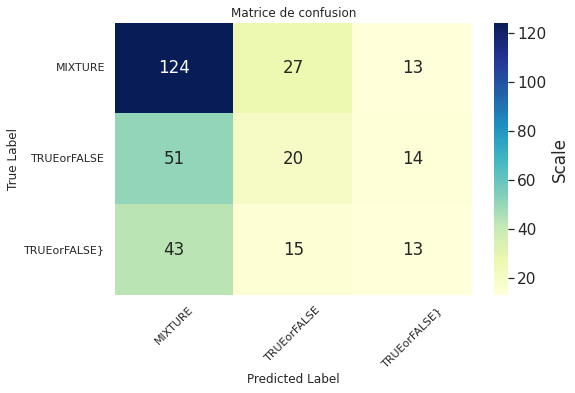

In [ ]:
from sklearn.metrics import plot_confusion_matrix

clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

y_pred = clf.predict(X_test)
MyshowAllScores(y_test,y_pred)

2. Classifieur RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
result = clf2.predict(X_test)

y_pred = clf2.predict(X_test)
MyshowAllScores(y_test,y_pred)

KeyboardInterrupt: ignored

3. Classifieur DecisionTree

Accuracy : 0.522
Classification Report
              precision    recall  f1-score   support

     MIXTURE    0.61635   0.59756   0.60681       164
 TRUEorFALSE    0.38462   0.41176   0.39773        85
TRUEorFALSE}    0.48571   0.47887   0.48227        71

    accuracy                        0.52187       320
   macro avg    0.49556   0.49607   0.49560       320
weighted avg    0.52581   0.52187   0.52364       320



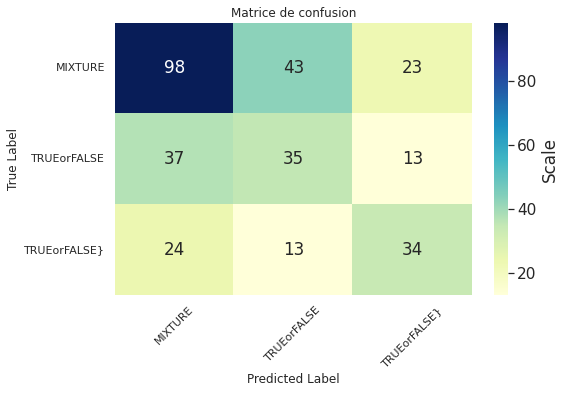

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)
result = clf3.predict(X_test)

y_pred = clf3.predict(X_test)
MyshowAllScores(y_test,y_pred)

4. Classifieur KNeighbors

Accuracy : 0.537
Classification Report
              precision    recall  f1-score   support

     MIXTURE    0.56299   0.87195   0.68421       164
 TRUEorFALSE    0.32432   0.14118   0.19672        85
TRUEorFALSE}    0.58621   0.23944   0.34000        71

    accuracy                        0.53750       320
   macro avg    0.49117   0.41752   0.40698       320
weighted avg    0.50475   0.53750   0.47835       320



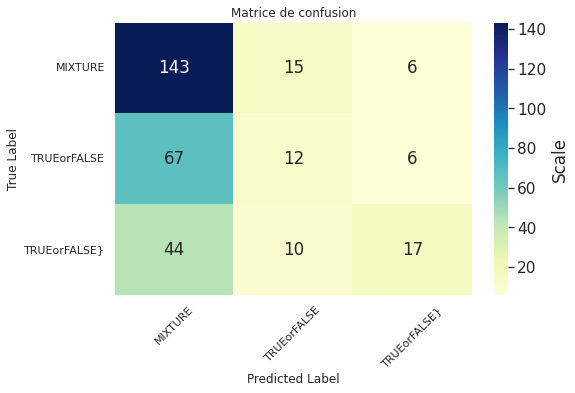

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier()
clf4.fit(X_train, y_train)
result = clf4.predict(X_test)

y_pred = clf4.predict(X_test)
MyshowAllScores(y_test,y_pred)

5. Classifieur MultinomialNB

Accuracy : 0.516
Classification Report
              precision    recall  f1-score   support

     MIXTURE    0.51411   1.00000   0.67909       164
 TRUEorFALSE    0.00000   0.00000   0.00000        85
TRUEorFALSE}    1.00000   0.01408   0.02778        71

    accuracy                        0.51562       320
   macro avg    0.50470   0.33803   0.23562       320
weighted avg    0.48535   0.51562   0.35420       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



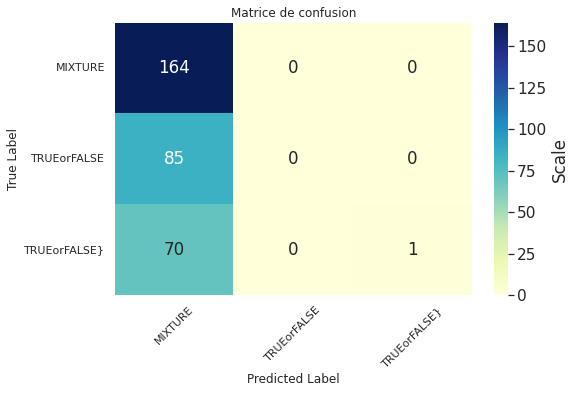

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf5 = MultinomialNB()
clf5.fit(X_train, y_train)
result = clf5.predict(X_test)

y_pred = clf5.predict(X_test)
MyshowAllScores(y_test,y_pred)

6. Classifieur LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf6 = LogisticRegression()
clf6.fit(X_train, y_train)
result = clf6.predict(X_test)

y_pred = clf6.predict(X_test)
MyshowAllScores(y_test,y_pred)

KeyboardInterrupt: ignored


7. Classifieur SVM

In [ ]:
from sklearn import svm
clf8 = svm.SVC()
clf8.fit(X_train, y_train)
result = clf8.predict(X_test)

y_pred = clf8.predict(X_test)
MyshowAllScores(y_test,y_pred)

KeyboardInterrupt: ignored

# Comparaison des classifieurs

1. Accuracy


In [ ]:
models = []
models.append(('MultinomialNB',MultinomialNB()))
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = 'accuracy'
allresults = []
results = []
names = []

for name,model in models:
 # cross validation en 10 fois
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

 print ("Evaluation de ",name)
 start_time = time.time()

 # application de la classification
 cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring=score)

 thetime=time.time() - start_time
 result=Result(name,cv_results.mean(),cv_results.std(),thetime)
 allresults.append(result)
 
 # pour affichage
 results.append(cv_results)
 names.append(name)

allresults=sorted(allresults, key=lambda result: result.scoremean, reverse=True)

 # affichage résultats

print ('\n Tous les résultats :')
for result in allresults:
 print ('Classifier : ',result.name,
 ' %s : %0.3f' %(score,result.scoremean),
 ' (%0.3f)'%result.stdresult,
 ' en %0.3f '%result.timespent,' s')

print ('\nLe meilleur resultat : ')
print ('Classifier : ',allresults[0].name, ' %s : %0.3f' %(score,allresults[0].scoremean), 
       ' (%0.3f)'%allresults[0].stdresult, ' en %0.3f '%allresults[0].timespent,' s\n')

NameError: ignored

[Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

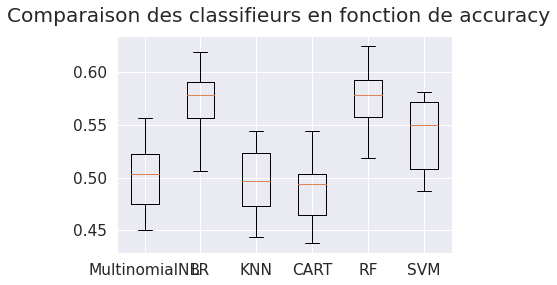

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparaison des classifieurs en fonction de accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Hypers Paramètres pour le meilleur classifieur


In [ ]:
# classifiers = { 'GaussianNB': GaussianNB(), 'RF': RandomForestClassifier(), 'CART' : DecisionTreeClassifier(), 'KNN' : KNeighborsClassifier(), 'MultinomialNB' : MultinomialNB(), 'LR' : LogisticRegression(solver='lbfgs'), 'SVM' : SVC(), } 
print("Test des hypers parametres sur le meilleur classifieur : " + allresults[0].name)

params = {
 'GaussianNB' : 
    [{'var_smoothing': np.logspace(0,-9, num=100)}],

 'RF':[{'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }],
 
 'LR' : [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }],

  'CART' : [{'max_depth': [2, 3, 5, 10, 21],
    'min_samples_leaf': [5, 10,16 ,20, 50, 100],
    'criterion': ["gini", "entropy"]}],

  'SVM' : [{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}],

  'KNN' : [{ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}],
          
  'MultinomialNB' : [{
    'alpha': np.linspace(0.5, 1.5, 6),
    'fit_prior': [True, False]}]
}

results = []
for name,model in models:
  if (allresults[0].name == name):
    gd_sr = GridSearchCV(estimator=model, param_grid=params[name], scoring='accuracy', cv=10, n_jobs=-1)

    gd_sr.fit(X_train, y_train)
    result=Result_Parameters(name,gd_sr.best_score_,gd_sr.best_estimator_)
    results.append(result)

results=sorted(results, key=lambda result: result.score, reverse=True)
print ('Le meilleur resultat : ')
print ('Classifier : ',results[0].name,
 ' score %0.2f' %results[0].score,
 ' avec ',results[0].parameters,' ')
print ('Tous les résultats : ')
for result in results:
 print ('Classifier : ',result.name,
 ' score %0.2f' %result.score,
 ' avec ',result.parameters,' ')

NameError: ignored

2. Recall

In [ ]:
score = 'recall'
allresults = []
results = []
names = []

for name,model in models:
 # cross validation en 10 fois
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

 print ("Evaluation de ",name)
 start_time = time.time()

 # application de la classification
 cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring=score)

 thetime=time.time() - start_time
 result=Result(name,cv_results.mean(),cv_results.std(),thetime)
 allresults.append(result)
 # pour affichage
 results.append(cv_results)
 names.append(name)

allresults=sorted(allresults, key=lambda result: result.scoremean, reverse=True)

 # affichage des résultats

print ('\nTous les résultats :')
for result in allresults:
 print ('Classifier : ',result.name,
 ' %s : %0.3f' %(score,result.scoremean),
 ' (%0.3f)'%result.stdresult,
 ' en %0.3f '%result.timespent,' s')

print ('\nLe meilleur resultat : ')
print ('Classifier : ',allresults[0].name, ' %s : %0.3f' %(score,allresults[0].scoremean), 
       ' (%0.3f)'%allresults[0].stdresult, ' en %0.3f '%allresults[0].timespent,' s\n')

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparaison des classifieurs en fonction de recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)